### **Company Bankruptcy Prediction**




In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data_sets/data.csv')
df

Bankrupt?   ROA(C) before interest and depreciation before interest  \
0             1                                           0.370594          
1             1                                           0.464291          
2             1                                           0.426071          
3             1                                           0.399844          
4             1                                           0.465022          
...         ...                                                ...          
6814          0                                           0.493687          
6815          0                                           0.475162          
6816          0                                           0.472725          
6817          0                                           0.506264          
6818          0                                           0.493053          

       ROA(A) before interest and % after tax  \
0                                    0.424389   
1                                    0.538214   
2                                    0.499019   
3                                    0.451265   
4                                    0.538432   
...                                       ...   
6814                                 0.539468   
6815                                 0.538269   
6816                                 0.533744   
6817                                 0.559911   
6818                                 0.570105   

       ROA(B) before interest and depreciation after tax  \
0                                              0.405750    
1                                              0.516730    
2                                              0.472295    
3                                              0.457733    
4                                              0.522298    
...                                                 ...    
6814                                           0.543230    
6815                                           0.524172    
6816                                           0.520638    
6817                                           0.554045    
6818                                           0.549548    

       Operating Gross Margin   Realized Sales Gross Margin  \
0                    0.601457                      0.601457   
1                    0.610235                      0.610235   
2                    0.601450                      0.601364   
3                    0.583541                      0.583541   
4                    0.598783                      0.598783   
...                       ...                           ...   
6814                 0.604455                      0.604462   
6815                 0.598308                      0.598308   
6816                 0.610444                      0.610213   
6817                 0.607850                      0.607850   
6818                 0.627409                      0.627409   

       Operating Profit Rate   Pre-tax net Interest Rate  \
0                   0.998969                    0.796887   
1                   0.998946                    0.797380   
2                   0.998857                    0.796403   
3                   0.998700                    0.796967   
4                   0.998973                    0.797366   
...                      ...                         ...   
6814                0.998992                    0.797409   
6815                0.998992                    0.797414   
6816                0.998984                    0.797401   
6817                0.999074                    0.797500   
6818                0.998080                    0.801987   

       After-tax net Interest Rate  \
0                         0.808809   
1                         0.809301   
2                         0.808388   
3                         0.808966   
4                         0.809304   
...                            ...   
6814                      0

In [ ]:
df.shape

(6819, 96)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

All 95 Financial Ratios
The accounting measures are categorized below with their detailed definitions, and how credit risk might be affected:

# 1. Profitability Ratios:

1: ROA(C) - Return On Total Assets(C): Measures the company's ability to generate earnings from its total assets. Higher ROA indicates better profitability and lower credit risk as the company efficiently utilizes its assets.

2: ROA(A) - Return On Total Assets(A): Measures the company's ability to generate earnings from its total assets after tax. Higher ROA(A) implies better profitability and lower credit risk.

3: ROA(B) - Return On Total Assets(B): Measures the company's ability to generate earnings from its total assets after tax and depreciation. Higher ROA(B) indicates better profitability and lower credit risk.

4: Operating Gross Margin: Calculates the percentage of gross profit from net sales. Higher margin implies better profitability and lowers credit risk.
5: Realized Sales Gross Margin: Indicates the realized gross profit percentage from net sales. Higher margin implies better profitability and reduces credit risk.

6: Operating Profit Rate: Shows the percentage of operating income to net sales. Higher operating profit rate indicates better operational efficiency and lowers credit risk.

7: Pre-tax Net Interest Rate: Measures the proportion of pre-tax income to net sales. Lower rate is favorable, as it suggests the company has enough earnings to cover interest expenses, reducing credit risk.
8: After-tax Net Interest Rate: Indicates the proportion of net income to net sales. Lower rate is favorable, indicating better ability to cover interest expenses and lower credit risk.

9: Non-industry Income and Expenditure/Revenue: Net Non-operating Income Ratio. Measures non-industry income and expenditure as a percentage of revenue. Lower ratio is favorable, as non-industry activities can be volatile and increase credit risk.

10: Continuous Interest Rate (After Tax): Continuous interest rate after tax and excluding disposal gain or loss, indicating the cost of debt financing. Higher interest rate may increase financial stress and credit risk.

19: Persistent EPS in the Last Four Seasons: Measures the trend of earnings per share (EPS) over the last four seasons. Consistently positive growth indicates financial stability and lowers credit risk.

20: Cash Flow Per Share: Indicates the amount of cash generated per outstanding share. Higher cash flow per share means the company has more liquidity to meet obligations, reducing credit risk.

16: Net Value Per Share (B) - Book Value Per Share(B): Indicates the book value of equity per outstanding share. Higher net value per share suggests a more stable financial position and lower credit risk.

2. Liquidity Ratios:

33: Current Ratio: Compares current assets to current liabilities. Higher current ratio indicates better short-term liquidity and lower credit risk.
34: Quick Ratio (Acid Test): Similar to the current ratio, but excludes inventories. Higher quick ratio suggests higher immediate liquidity and reduces credit risk.

57: Cash/Total Assets: Shows the proportion of total assets held in cash. Higher cash reserves enhance liquidity and reduce credit risk.
X55: Quick Assets/Total Assets: Measures the proportion of quick assets (current assets - inventories) to total assets. Higher ratio indicates better liquidity and lower credit risk.

58: Quick Assets/Current Liability: Shows the proportion of quick assets to current liabilities. Higher ratio indicates better ability to meet short-term obligations and lower credit risk.

59: Cash/Current Liability: Indicates the proportion of cash to current liabilities. Higher ratio signifies better liquidity and lower credit risk.
X60: Current Liability to Assets: Measures the proportion of current liabilities to total assets. Higher ratio implies higher financial risk and credit risk.

3. Leverage Ratios:

36: Total Debt/Total Net Worth: Shows the proportion of total debt to shareholders' equity. Higher leverage ratio indicates higher financial risk and credit risk.

37: Debt Ratio: Measures the proportion of total debt to total assets. Higher debt ratio suggests higher financial leverage and credit risk.

39: Long-term Fund Suitability Ratio (A): (Long-term Liability + Equity)/Fixed Assets. Assesses the long-term financial stability of a company. Lower ratio is favorable for credit risk.

40: Borrowing Dependency: Indicates the reliance on external borrowing for financing. Higher dependency raises credit risk.

67: Long-term Liability to Current Assets: Measures the proportion of long-term liabilities to current assets. Higher ratio indicates higher financial risk and credit risk.

79: Equity to Long-term Liability: Shows the proportion of equity to long-term liabilities. Higher ratio implies better financial health and lower credit risk.

4. Activity or Efficiency Ratios:

5: Realized Sales Gross Margin: Indicates the realized sales' gross profit percentage. Higher margin implies better sales efficiency and lower credit risk.
11: Operating Expense Rate: Compares operating expenses to net sales. Lower rate indicates better cost management and reduces credit risk.

12: Research and Development Expense Rate: Measures R&D expenses as a percentage of net sales. Lower ratio suggests better financial management and lower credit risk.

45: Total Asset Turnover: Shows how efficiently assets generate revenue. Higher turnover implies better asset utilization and lower credit risk.

46: Accounts Receivable Turnover: Measures how quickly accounts receivables are collected. Higher turnover indicates better liquidity and lower credit risk.

47: Average Collection Days (Days Receivable Outstanding): Shows the average time taken to collect receivables. Lower collection days imply better liquidity and reduced credit risk.

48: Inventory Turnover Rate (times): Measures how quickly inventory is sold. Higher turnover indicates better inventory management and lower credit risk.

50: Net Worth Turnover Rate (Equity Turnover): Indicates how effectively net worth is utilized to generate revenue. Higher ratio suggests better financial management and lower credit risk.

51: Revenue per Person (Sales Per Employee): Measures revenue generated per employee. Higher revenue per person suggests better operational efficiency and lower credit risk.

52: Operating Profit per Person (Operating Income Per Employee): Shows operating profit generated per employee. Higher value indicates better productivity and reduced credit risk.

5. Cash Flow Ratios:

75: Cash Flow to Sales: Measures the proportion of cash flow to net sales. Higher ratio indicates better cash generation and lower credit risk.
X80: Cash Flow to Total Assets: Shows the proportion of cash flow to total assets. Higher ratio indicates better liquidity and reduced credit risk.

81: Cash Flow to Liability: Indicates the proportion of cash flow to total liabilities. Higher ratio suggests better ability to meet obligations and lower credit risk.

82: CFO to Assets: Compares operating cash flow to total assets. Higher ratio implies better financial health and lower credit risk.
X83: Cash Flow to Equity: Measures the proportion of cash flow to shareholders' equity. Higher ratio indicates better financial position and lower credit risk.

6. Solvency Ratios:

87: Total Assets to GNP Price: Compares the total assets to the Gross National Product (GNP) price. Lower ratio may indicate undervaluation and credit risk.
X88: No-credit Interval: Measures the number of days a company can sustain without credit. Higher interval indicates better financial stability and lower credit risk.

41: Contingent Liabilities to Net Worth: Shows the proportion of contingent liabilities to shareholders' equity. Higher ratio implies higher financial risk and credit risk.

62: Operating Funds to Liability: Indicates the proportion of operating funds to total liabilities. Higher ratio suggests better financial stability and lower credit risk.

7. Coverage Ratios:

68: Retained Earnings to Total Assets: Indicates the proportion of retained earnings to total assets. Higher ratio suggests a company's ability to retain profits and reduce credit risk.
93: Interest Coverage Ratio (Interest expense to EBIT): Measures how well a company can cover its interest expenses with its earnings before interest and taxes (EBIT). Higher ratio indicates better ability to service debt and lower credit risk.

8. Profitability Growth Ratios:

24: Realized Sales Gross Profit Growth Rate: Measures the growth rate of realized gross profit over time. Higher growth rate indicates improved profitability and lowers credit risk.

25: Operating Profit Growth Rate: Measures the growth rate of operating income over time. Higher growth rate suggests better operational efficiency and lowers credit risk.

26: After-tax Net Profit Growth Rate: Measures the growth rate of net income after tax over time. Higher growth rate indicates better profitability and reduces credit risk.

27: Regular Net Profit Growth Rate: Measures the growth rate of continuing operating income after tax over time. Higher growth rate implies improved stability and lowers credit risk.

28: Continuous Net Profit Growth Rate: Measures the growth rate of net income excluding disposal gain or loss over time. Higher growth rate suggests better financial stability and reduces credit risk.

29: Total Asset Growth Rate: Measures the growth rate of total assets over time. Steady growth indicates financial stability and lowers credit risk.
X30: Net Value Growth Rate: Measures the growth rate of total equity (net value) over time. Higher growth rate indicates improving financial position and lowers credit risk.

31: Total Asset Return Growth Rate Ratio: Measures the return on total asset growth over time. Higher ratio suggests better utilization of assets and lowers credit risk.

32: Cash Reinvestment %: Measures the proportion of cash reinvested back into the company. Higher percentage indicates better internal investment and reduces credit risk.

9. Inventory Management Ratios:

44: Inventory and Accounts Receivable to Net Value: Measures the proportion of inventory and accounts receivable to equity. Lower ratio indicates better inventory management and lowers credit risk.

63: Inventory to Working Capital: Shows the proportion of inventory to working capital. Lower ratio suggests better liquidity management and lowers credit risk.

10. Activity Turnover Ratios:

49: Fixed Assets Turnover Frequency: Measures the frequency of fixed assets turnover. Higher frequency indicates better utilization of fixed assets and lowers credit risk.

11. Working Capital Ratios:

54: Working Capital to Total Assets: Measures the proportion of working capital to total assets. Higher ratio suggests better liquidity and reduces credit risk.

12. Liability-Related Ratios:

69: Total Income to Total Expense: Compares total income to total expenses. Higher ratio indicates better financial management and lowers credit risk.
X70: Total Expense to Assets: Compares total expenses to total assets. Lower ratio indicates better financial efficiency and lowers credit risk.
X64: Current Liabilities to Liability: Measures the proportion of current liabilities to total liabilities. Higher ratio indicates higher short-term debt burden and credit risk.

65: Current Liabilities to Equity: Shows the proportion of current liabilities to equity. Higher ratio suggests higher financial risk and credit risk.
85: Liability-Assets Flag: 1 if Total Liability exceeds Total Assets, 0 otherwise. Higher value indicates higher financial risk and credit risk.
91: Liability to Equity: Compares total liabilities to equity. Higher ratio suggests higher financial risk and credit risk.

92: Degree of Financial Leverage (DFL): Measures the sensitivity of earnings to changes in operating income. Higher DFL implies higher financial risk and credit risk.

13. Miscellaneous Ratios:

38: Net Worth to Assets: Compares net worth to total assets. Higher ratio indicates better financial position and reduces credit risk.
71: Current Asset Turnover Rate: Measures how efficiently current assets are utilized to generate sales. Higher turnover rate implies better liquidity management and lowers credit risk.

72: Quick Asset Turnover Rate: Measures how efficiently quick assets are utilized to generate sales. Higher turnover rate suggests better liquidity management and lowers credit risk.

73: Working Capital Turnover Rate: Measures how efficiently working capital is utilized to generate sales. Higher turnover rate indicates better liquidity management and lowers credit risk.

74: Cash Turnover Rate: Measures how efficiently cash is utilized to generate sales. Higher turnover rate suggests better liquidity management and lowers credit risk.

86: Net Income to Total Assets: Measures the proportion of net income to total assets. Higher ratio suggests better profitability and reduces credit risk.
X89: Gross Profit to Sales: Compares gross profit to net sales. Higher ratio indicates better profitability and lowers credit risk.

90: Net Income to Stockholder's Equity: Measures the proportion of net income to stockholders' equity. Higher ratio indicates better financial stability and lowers credit risk.

By categorizing the accounting measures with their corresponding labels, financial analysts and stakeholders can more easily refer to specific ratios and assess a company's financial health, risk profile, and creditworthiness. It is essential to consider multiple ratios within each category to gain a comprehensive understanding of a company's financial position and credit risk. Comparing these ratios to industry benchmarks and historical trends further enhances the assessment.



**

In [ ]:
X = df.iloc[:,1:]
X

ROA(C) before interest and depreciation before interest  \
0                                              0.370594          
1                                              0.464291          
2                                              0.426071          
3                                              0.399844          
4                                              0.465022          
...                                                 ...          
6814                                           0.493687          
6815                                           0.475162          
6816                                           0.472725          
6817                                           0.506264          
6818                                           0.493053          

       ROA(A) before interest and % after tax  \
0                                    0.424389   
1                                    0.538214   
2                                    0.499019   
3                                    0.451265   
4                                    0.538432   
...                                       ...   
6814                                 0.539468   
6815                                 0.538269   
6816                                 0.533744   
6817                                 0.559911   
6818                                 0.570105   

       ROA(B) before interest and depreciation after tax  \
0                                              0.405750    
1                                              0.516730    
2                                              0.472295    
3                                              0.457733    
4                                              0.522298    
...                                                 ...    
6814                                           0.543230    
6815                                           0.524172    
6816                                           0.520638    
6817                                           0.554045    
6818                                           0.549548    

       Operating Gross Margin   Realized Sales Gross Margin  \
0                    0.601457                      0.601457   
1                    0.610235                      0.610235   
2                    0.601450                      0.601364   
3                    0.583541                      0.583541   
4                    0.598783                      0.598783   
...                       ...                           ...   
6814                 0.604455                      0.604462   
6815                 0.598308                      0.598308   
6816                 0.610444                      0.610213   
6817                 0.607850                      0.607850   
6818                 0.627409                      0.627409   

       Operating Profit Rate   Pre-tax net Interest Rate  \
0                   0.998969                    0.796887   
1                   0.998946                    0.797380   
2                   0.998857                    0.796403   
3                   0.998700                    0.796967   
4                   0.998973                    0.797366   
...                      ...                         ...   
6814                0.998992                    0.797409   
6815                0.998992                    0.797414   
6816                0.998984                    0.797401   
6817                0.999074                    0.797500   
6818                0.998080                    0.801987   

       After-tax net Interest Rate  \
0                         0.808809   
1                         0.809301   
2                         0.808388   
3                         0.808966   
4                         0.809304   
...                            ...   
6814                      0.809331   
6815                      0.809327   
6816                      0.809317   
6817                      0.809399   
6818    

In [ ]:
y = df.iloc[:,0]
y

0       1
1       1
2       1
3       1
4       1
       ..
6814    0
6815    0
6816    0
6817    0
6818    0
Name: Bankrupt?, Length: 6819, dtype: int64

In [ ]:
y.value_counts()

0    6599
1     220
Name: Bankrupt?, dtype: int64

In [ ]:
220/6599

0.03333838460372784

In [ ]:
df.describe()

Bankrupt?   ROA(C) before interest and depreciation before interest  \
count  6819.000000                                        6819.000000          
mean      0.032263                                           0.505180          
std       0.176710                                           0.060686          
min       0.000000                                           0.000000          
25%       0.000000                                           0.476527          
50%       0.000000                                           0.502706          
75%       0.000000                                           0.535563          
max       1.000000                                           1.000000          

        ROA(A) before interest and % after tax  \
count                              6819.000000   
mean                                  0.558625   
std                                   0.065620   
min                                   0.000000   
25%                                   0.535543   
50%                                   0.559802   
75%                                   0.589157   
max                                   1.000000   

        ROA(B) before interest and depreciation after tax  \
count                                        6819.000000    
mean                                            0.553589    
std                                             0.061595    
min                                             0.000000    
25%                                             0.527277    
50%                                             0.552278    
75%                                             0.584105    
max                                             1.000000    

        Operating Gross Margin   Realized Sales Gross Margin  \
count              6819.000000                   6819.000000   
mean                  0.607948                      0.607929   
std                   0.016934                      0.016916   
min                   0.000000                      0.000000   
25%                   0.600445                      0.600434   
50%                   0.605997                      0.605976   
75%                   0.613914                      0.613842   
max                   1.000000                      1.000000   

        Operating Profit Rate   Pre-tax net Interest Rate  \
count             6819.000000                 6819.000000   
mean                 0.998755                    0.797190   
std                  0.013010                    0.012869   
min                  0.000000                    0.000000   
25%                  0.998969                    0.797386   
50%                  0.999022                    0.797464   
75%                  0.999095                    0.797579   
max                  1.000000                    1.000000   

        After-tax net Interest Rate  \
count                   6819.000000   
mean                       0.809084   
std                        0.013601   
min                        0.000000   
25%                        0.809312   
50%                        0.809375   
75%                        0.809469   
max                        1.000000   

        Non-industry income and expenditure/revenue  ...  \
count                                   6819.000000  ...   
mean                                       0.303623  ...   
std                                        0.011163  ...   
min                                        0.000000  ...   
25%                                        0.303466  ...   
50%                                        0.303525  ...   
75%                                        0.303585  ...   
max                                        1.000000  ...   

        Net Income to Total Assets   Total assets to GNP price  \
count                  6819.000000                6.819000e+03   
mean                      0.807760                1.862942e+07   
std                       0.040332                3.764501e+08   
min

**Splitting the data into training and test set**

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33,random_state = 1)

**Initializing  an instance for different machine learning classifier**

---



In [ ]:
knn=KNeighborsClassifier()
sv=SVC()
gnb=GaussianNB()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier(random_state=1)
ad=AdaBoostClassifier(random_state=1)
algo_accuracy=[]


**Training the each model and displaying their accuracy score**

In [ ]:
models=[knn,sv,gnb,dt,rf,ad]
for model in models:
  print("*********",model,"*******")
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  print(classification_report(y_test,y_pred))
  print('Accuracy score=',accuracy_score(y_test,y_pred))
  algo_accuracy.append(accuracy_score(y_test,y_pred)*100)

********* KNeighborsClassifier() *******
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2178
           1       0.14      0.01      0.03        73

    accuracy                           0.97      2251
   macro avg       0.56      0.51      0.50      2251
weighted avg       0.94      0.97      0.95      2251

Accuracy score= 0.9653487338960463
********* SVC() *******
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2178
           1       0.00      0.00      0.00        73

    accuracy                           0.97      2251
   macro avg       0.48      0.50      0.49      2251
weighted avg       0.94      0.97      0.95      2251

Accuracy score= 0.9675699689027099
********* GaussianNB() *******
              precision    recall  f1-score   support

           0       0.98      0.04      0.07      2178
           1       0.03      0.97      0.06        73

    accuracy    

**Bar graph on accuracy of each classifier **

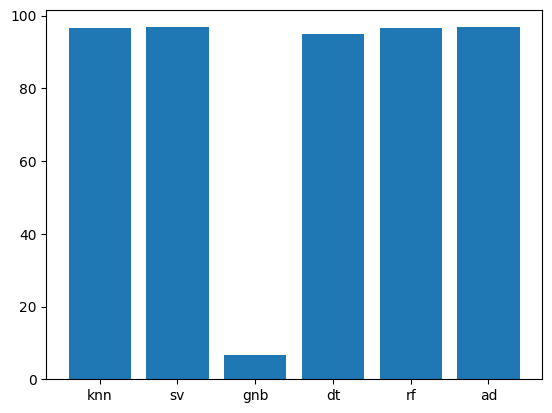

In [ ]:
x1 = ['knn','sv','gnb','dt','rf','ad']
y1 = algo_accuracy
plt.bar(x1,y1)
plt.show()

**checking weather the dataset is imbalanced or not**

In [ ]:
y.value_counts()



0    6599
1     220
Name: Bankrupt?, dtype: int64

**what percent of the company is bankruot?????**

In [ ]:
220/6599

0.03333838460372784

**Bar graph - Bankrupt vs Not bankrupt**

<Axes: xlabel='Bankrupt?', ylabel='count'>

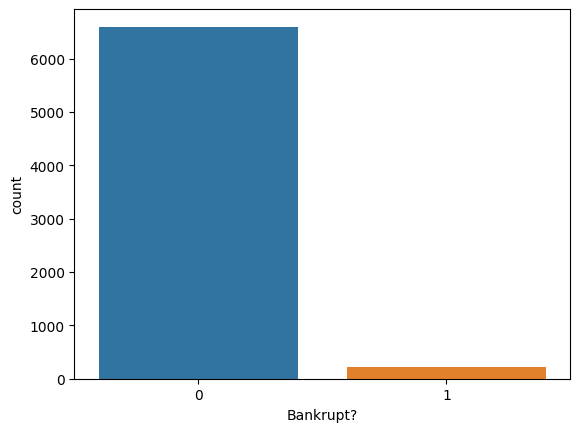

In [ ]:

sns.countplot(x = y ,data = df)

Oversampling

In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(random_state = 1)
X_os,y_os = oversample.fit_resample(X,y)

In [ ]:
y_os.value_counts()

1    6599
0    6599
Name: Bankrupt?, dtype: int64

**Train-Test-split**

In [ ]:
X_train_os,X_test_os,y_train_os,y_test_os = train_test_split(X_os,y_os,random_state = 1,test_size = 0.3)

**Creating new instances for the classifiers**

In [ ]:
knn_os=KNeighborsClassifier()
sv_os=SVC()
gnb_os=GaussianNB()
dt_os=DecisionTreeClassifier()
rf_os=RandomForestClassifier(random_state=1)
ad_os=AdaBoostClassifier(random_state=1)
algo_accuracy1=[]

**Training the Model after over sampling**

In [ ]:
from sklearn.metrics import classification_report,accuracy_score
models=[knn_os,sv_os,gnb_os,dt_os,rf_os,ad_os]
for model in models:
  print("*********",model,"*******")
  model.fit(X_train_os,y_train_os)
  y_pred_os=model.predict(X_test_os)
  print(classification_report(y_test_os,y_pred_os))
  print('Accuracy score=',accuracy_score(y_test_os,y_pred_os))
  algo_accuracy1.append(accuracy_score(y_test_os,y_pred_os)*100)

********* KNeighborsClassifier() *******
              precision    recall  f1-score   support

           0       0.98      0.82      0.89      1999
           1       0.84      0.98      0.91      1961

    accuracy                           0.90      3960
   macro avg       0.91      0.90      0.90      3960
weighted avg       0.91      0.90      0.90      3960

Accuracy score= 0.8997474747474747
********* SVC() *******
              precision    recall  f1-score   support

           0       0.85      0.76      0.80      1999
           1       0.78      0.87      0.82      1961

    accuracy                           0.81      3960
   macro avg       0.82      0.81      0.81      3960
weighted avg       0.82      0.81      0.81      3960

Accuracy score= 0.8123737373737374
********* GaussianNB() *******
              precision    recall  f1-score   support

           0       0.67      0.04      0.08      1999
           1       0.50      0.98      0.66      1961

    accuracy    

**Bar-graph for accuracy score**

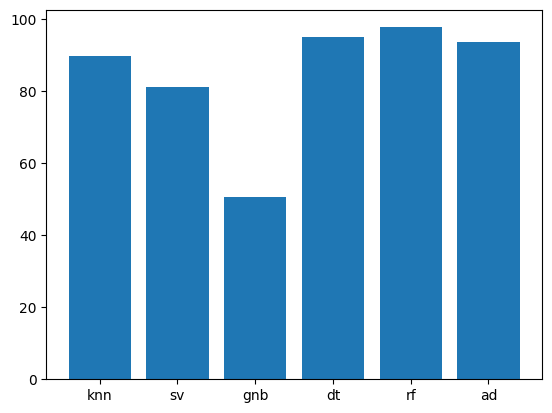

In [ ]:
x2 = ['knn','sv','gnb','dt','rf','ad']
y2 = algo_accuracy1
plt.bar(x2,y2)
plt.show()

Undersampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
undersampler = RandomUnderSampler(random_state = 1)
X_us,y_us = undersampler.fit_resample(X,y)

**Values after under-sampling**

In [ ]:
y_us.value_counts()

0    220
1    220
Name: Bankrupt?, dtype: int64

**Train-Test-Split**

In [ ]:
X_train_us,X_test_us,y_train_us,y_test_us = train_test_split(X_us,y_us,random_state = 1,test_size = 0.3)

**Creating New Instances**

In [ ]:
knn_us=KNeighborsClassifier()
sv_us=SVC()
gnb_us=GaussianNB()
dt_us=DecisionTreeClassifier()
rf_us=RandomForestClassifier(max_depth = 15, min_samples_leaf = 2, min_samples_split = 2, n_estimators =100)
ad_us=AdaBoostClassifier(random_state=1)
algo_accuracy2=[]

**Training After under-sampling**

In [ ]:
from sklearn.metrics import classification_report,accuracy_score
models=[knn_us,sv_us,gnb_us,dt_us,rf_us,ad_us]
for model in models:
  print("*********",model,"*******")
  model.fit(X_train_us,y_train_us)
  y_pred_us=model.predict(X_test_us)
  print(classification_report(y_test_us,y_pred_us))
  print('Accuracy score=',accuracy_score(y_test_us,y_pred_us))
  algo_accuracy2.append(accuracy_score(y_test_us,y_pred_us)*100)

********* KNeighborsClassifier() *******
              precision    recall  f1-score   support

           0       0.53      0.69      0.60        61
           1       0.64      0.48      0.55        71

    accuracy                           0.58       132
   macro avg       0.59      0.58      0.57       132
weighted avg       0.59      0.58      0.57       132

Accuracy score= 0.5757575757575758
********* SVC() *******
              precision    recall  f1-score   support

           0       0.50      0.75      0.60        61
           1       0.62      0.35      0.45        71

    accuracy                           0.54       132
   macro avg       0.56      0.55      0.53       132
weighted avg       0.57      0.54      0.52       132

Accuracy score= 0.5378787878787878
********* GaussianNB() *******
              precision    recall  f1-score   support

           0       0.47      1.00      0.64        61
           1       1.00      0.01      0.03        71

    accuracy    

**Bar-graph for accuray score**

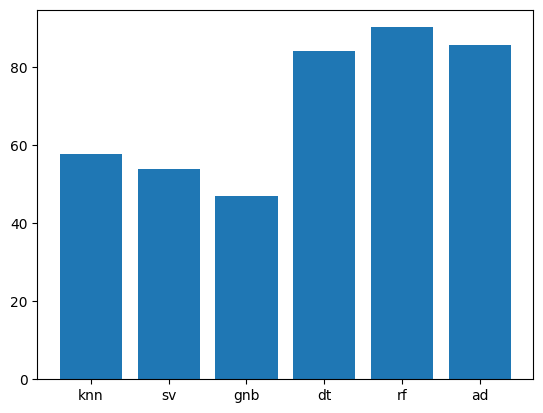

In [ ]:
x3 = ['knn','sv','gnb','dt','rf','ad']
y3 = algo_accuracy2
plt.bar(x3,y3)
plt.show()

**Correlation**

In [ ]:
corr_matrix = df.corr()
corr_matrix


Bankrupt?  \
Bankrupt?                                            1.000000   
 ROA(C) before interest and depreciation before...  -0.260807   
 ROA(A) before interest and % after tax             -0.282941   
 ROA(B) before interest and depreciation after tax  -0.273051   
 Operating Gross Margin                             -0.100043   
...                                                       ...   
 Liability to Equity                                 0.166812   
 Degree of Financial Leverage (DFL)                  0.010508   
 Interest Coverage Ratio (Interest expense to E...  -0.005509   
 Net Income Flag                                          NaN   
 Equity to Liability                                -0.083048   

                                                     ROA(C) before interest and depreciation before interest  \
Bankrupt?                                                                                   -0.260807          
 ROA(C) before interest and depreciation before...                                           1.000000          
 ROA(A) before interest and % after tax                                                      0.940124          
 ROA(B) before interest and depreciation after tax                                           0.986849          
 Operating Gross Margin                                                                      0.334719          
...                                                                                               ...          
 Liability to Equity                                                                        -0.143629          
 Degree of Financial Leverage (DFL)                                                         -0.016575          
 Interest Coverage Ratio (Interest expense to E...                                           0.010573          
 Net Income Flag                                                                                  NaN          
 Equity to Liability                                                                         0.052416          

                                                     ROA(A) before interest and % after tax  \
Bankrupt?                                                                         -0.282941   
 ROA(C) before interest and depreciation before...                                 0.940124   
 ROA(A) before interest and % after tax                                            1.000000   
 ROA(B) before interest and depreciation after tax                                 0.955741   
 Operating Gross Margin                                                            0.326969   
...                                                                                     ...   
 Liability to Equity                                                              -0.141039   
 Degree of Financial Leverage (DFL)                                               -0.011515   
 Interest Coverage Ratio (Interest expense to E...                                 0.013372   
 Net Income Flag                                                                        NaN   
 Equity to Liability                                                               0.057887   

                                                     ROA(B) before interest and depreciation after tax  \
Bankrupt?                                                                                   -0.273051    
 ROA(C) before interest and depreciation before...                                           0.986849    
 ROA(A) before interest and % after tax                                                      0.955741    
 ROA(B) before interest and depreciation after tax                                           1.000000    
 Operating Gross Margin                                                                      0.333749    
...                                                                                               ...    
 Liability to Equity                       

Heat Map

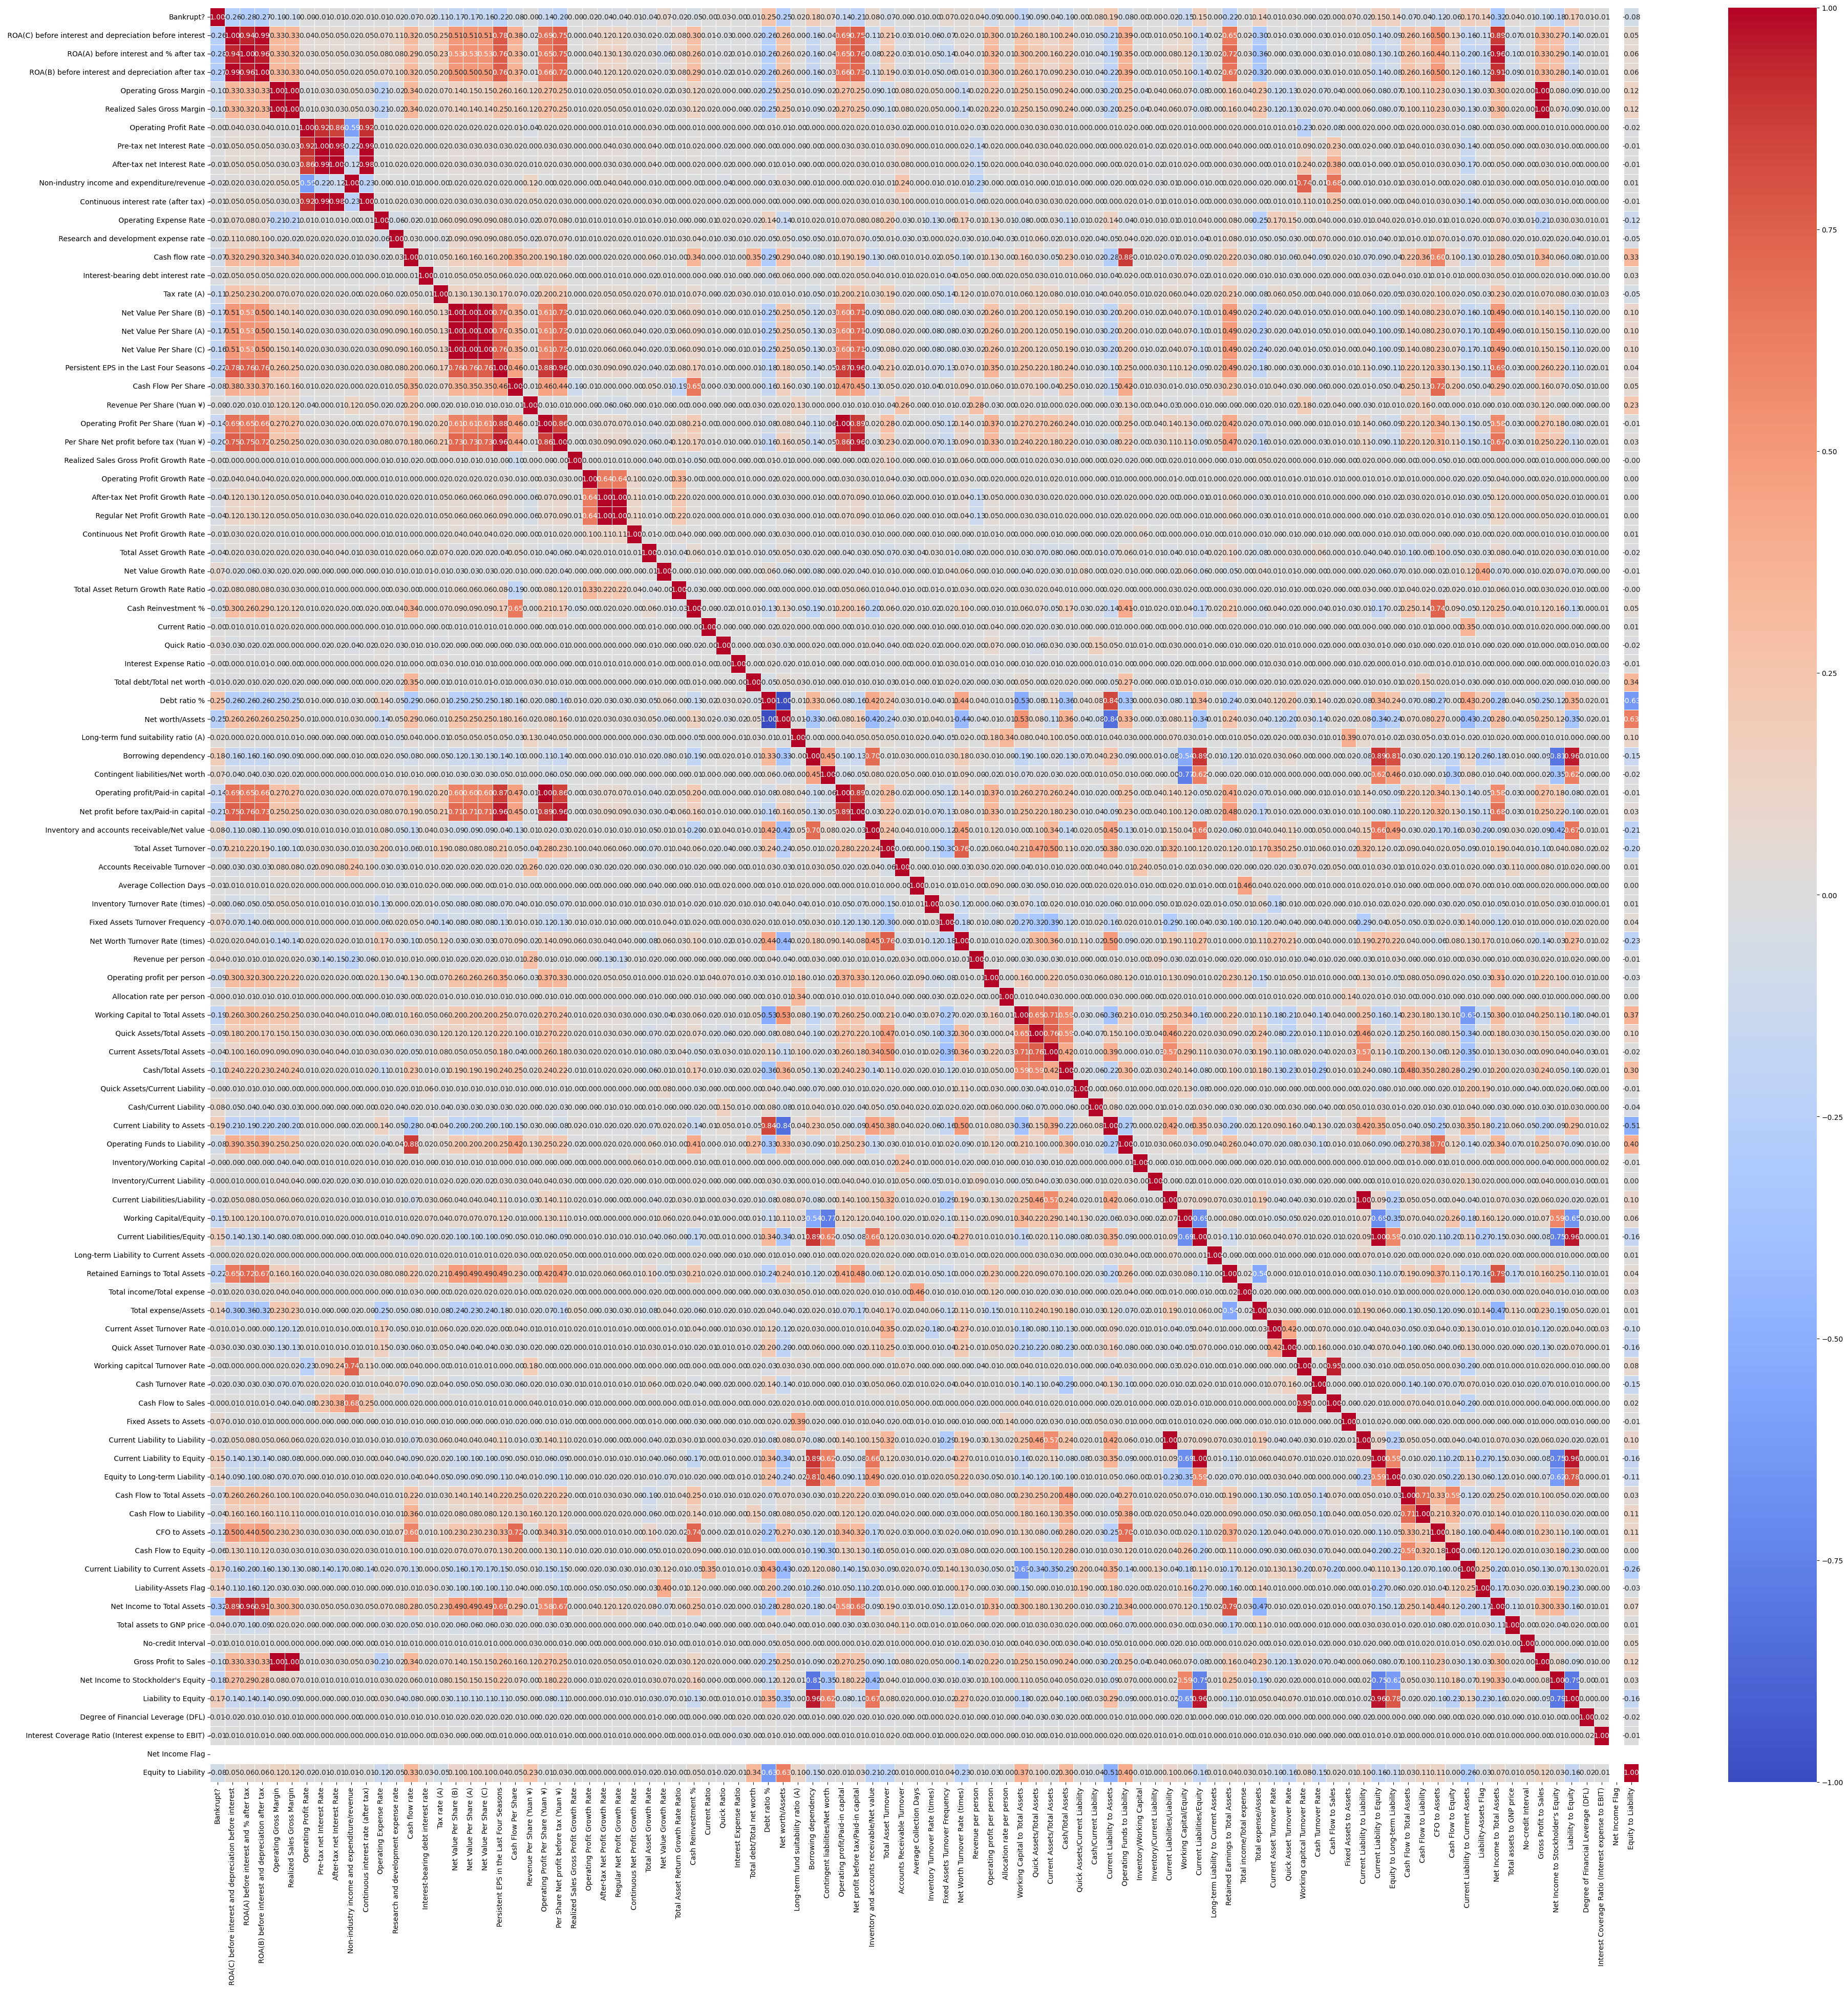

In [ ]:
plt.figure(figsize=(45,45))
sns.heatmap(corr_matrix,annot = True,cmap = 'coolwarm',linewidth =0.5,fmt ='.2f')
plt.show()

**Selection the correlation between bankrupt and all the other variable**

In [ ]:
bankrupt_corr = corr_matrix['Bankrupt?'].drop('Bankrupt?')
bankrupt_corr

 ROA(C) before interest and depreciation before interest   -0.260807
 ROA(A) before interest and % after tax                    -0.282941
 ROA(B) before interest and depreciation after tax         -0.273051
 Operating Gross Margin                                    -0.100043
 Realized Sales Gross Margin                               -0.099445
                                                              ...   
 Liability to Equity                                        0.166812
 Degree of Financial Leverage (DFL)                         0.010508
 Interest Coverage Ratio (Interest expense to EBIT)        -0.005509
 Net Income Flag                                                 NaN
 Equity to Liability                                       -0.083048
Name: Bankrupt?, Length: 95, dtype: float64

**Set corelation threshold**

In [ ]:
corr_threshold = 0.2

In [ ]:
select_var = bankrupt_corr[abs(bankrupt_corr)> corr_threshold]
select_var

 ROA(C) before interest and depreciation before interest   -0.260807
 ROA(A) before interest and % after tax                    -0.282941
 ROA(B) before interest and depreciation after tax         -0.273051
 Persistent EPS in the Last Four Seasons                   -0.219560
 Per Share Net profit before tax (Yuan ¥)                  -0.201395
 Debt ratio %                                               0.250161
 Net worth/Assets                                          -0.250161
 Net profit before tax/Paid-in capital                     -0.207857
 Retained Earnings to Total Assets                         -0.217779
 Net Income to Total Assets                                -0.315457
Name: Bankrupt?, dtype: float64

**select variables with highest absolute correlation with Bankrupt above a threshold 0.2**

In [ ]:
select_var = corr_matrix['Bankrupt?'][abs(corr_matrix['Bankrupt?'])> corr_threshold].index

**Correlation metrix for selected variables**

In [ ]:
selected_corr_matrix = df[select_var].corr()

In [ ]:
df[select_var]

Bankrupt?   ROA(C) before interest and depreciation before interest  \
0             1                                           0.370594          
1             1                                           0.464291          
2             1                                           0.426071          
3             1                                           0.399844          
4             1                                           0.465022          
...         ...                                                ...          
6814          0                                           0.493687          
6815          0                                           0.475162          
6816          0                                           0.472725          
6817          0                                           0.506264          
6818          0                                           0.493053          

       ROA(A) before interest and % after tax  \
0                                    0.424389   
1                                    0.538214   
2                                    0.499019   
3                                    0.451265   
4                                    0.538432   
...                                       ...   
6814                                 0.539468   
6815                                 0.538269   
6816                                 0.533744   
6817                                 0.559911   
6818                                 0.570105   

       ROA(B) before interest and depreciation after tax  \
0                                              0.405750    
1                                              0.516730    
2                                              0.472295    
3                                              0.457733    
4                                              0.522298    
...                                                 ...    
6814                                           0.543230    
6815                                           0.524172    
6816                                           0.520638    
6817                                           0.554045    
6818                                           0.549548    

       Persistent EPS in the Last Four Seasons  \
0                                     0.169141   
1                                     0.208944   
2                                     0.180581   
3                                     0.193722   
4                                     0.212537   
...                                        ...   
6814                                  0.216602   
6815                                  0.216697   
6816                                  0.210929   
6817                                  0.228326   
6818                                  0.227758   

       Per Share Net profit before tax (Yuan ¥)   Debt ratio %  \
0                                      0.138736       0.207576   
1                                      0.169918       0.171176   
2                                      0.142803       0.207516   
3                                      0.148603       0.151465   
4                                      0.168412       0.106509   
...                                         ...            ...   
6814                                   0.172102       0.124618   
6815                                   0.172780       0.099253   
6816                                   0.173232       0.038939   
6817                                   0.185584       0.086979   
6818                                   0.182119       0.014149   

       Net worth/Assets   Net profit before tax/Paid-in capital  \
0              0.792424                                0.137757   
1              0.828824                                0.168962   
2              0.792484                                0.148036   
3              0.848535                                0.147561   
4              0.893491                   

**Heatmap for selected correlation matrix**

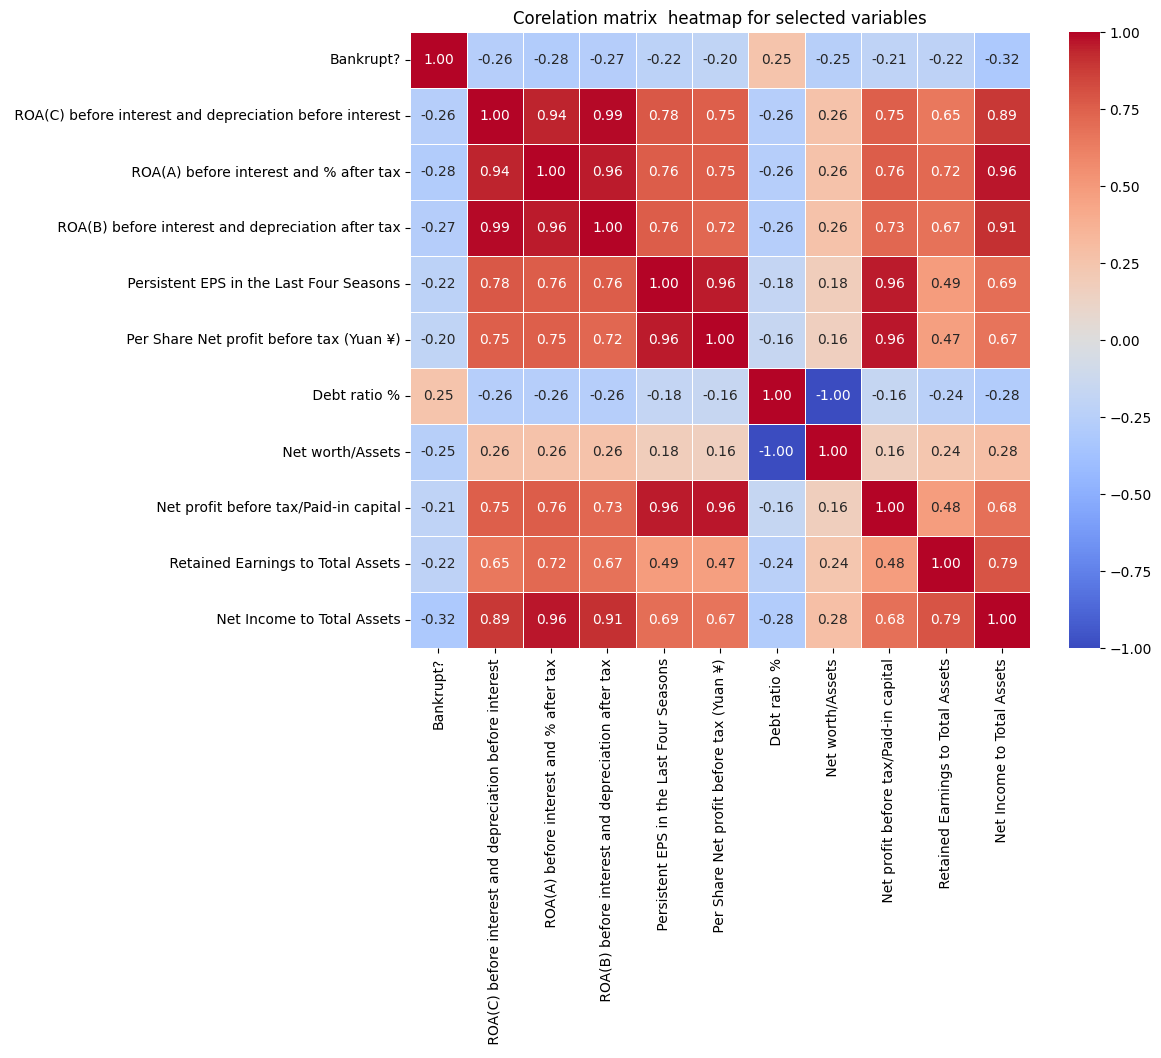

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(selected_corr_matrix,annot = True, cmap = 'coolwarm',fmt ='.2f',linewidth = 0.5)
plt.title('Corelation matrix  heatmap for selected variables')
plt.show()

**Eleminating the less corelated columns**

In [ ]:

df1 = df[select_var]
df1

Bankrupt?   ROA(C) before interest and depreciation before interest  \
0             1                                           0.370594          
1             1                                           0.464291          
2             1                                           0.426071          
3             1                                           0.399844          
4             1                                           0.465022          
...         ...                                                ...          
6814          0                                           0.493687          
6815          0                                           0.475162          
6816          0                                           0.472725          
6817          0                                           0.506264          
6818          0                                           0.493053          

       ROA(A) before interest and % after tax  \
0                                    0.424389   
1                                    0.538214   
2                                    0.499019   
3                                    0.451265   
4                                    0.538432   
...                                       ...   
6814                                 0.539468   
6815                                 0.538269   
6816                                 0.533744   
6817                                 0.559911   
6818                                 0.570105   

       ROA(B) before interest and depreciation after tax  \
0                                              0.405750    
1                                              0.516730    
2                                              0.472295    
3                                              0.457733    
4                                              0.522298    
...                                                 ...    
6814                                           0.543230    
6815                                           0.524172    
6816                                           0.520638    
6817                                           0.554045    
6818                                           0.549548    

       Persistent EPS in the Last Four Seasons  \
0                                     0.169141   
1                                     0.208944   
2                                     0.180581   
3                                     0.193722   
4                                     0.212537   
...                                        ...   
6814                                  0.216602   
6815                                  0.216697   
6816                                  0.210929   
6817                                  0.228326   
6818                                  0.227758   

       Per Share Net profit before tax (Yuan ¥)   Debt ratio %  \
0                                      0.138736       0.207576   
1                                      0.169918       0.171176   
2                                      0.142803       0.207516   
3                                      0.148603       0.151465   
4                                      0.168412       0.106509   
...                                         ...            ...   
6814                                   0.172102       0.124618   
6815                                   0.172780       0.099253   
6816                                   0.173232       0.038939   
6817                                   0.185584       0.086979   
6818                                   0.182119       0.014149   

       Net worth/Assets   Net profit before tax/Paid-in capital  \
0              0.792424                                0.137757   
1              0.828824                                0.168962   
2              0.792484                                0.148036   
3              0.848535                                0.147561   
4              0.893491                   

In [ ]:
X1 = df1.iloc[:,1:]
X1

ROA(C) before interest and depreciation before interest  \
0                                              0.370594          
1                                              0.464291          
2                                              0.426071          
3                                              0.399844          
4                                              0.465022          
...                                                 ...          
6814                                           0.493687          
6815                                           0.475162          
6816                                           0.472725          
6817                                           0.506264          
6818                                           0.493053          

       ROA(A) before interest and % after tax  \
0                                    0.424389   
1                                    0.538214   
2                                    0.499019   
3                                    0.451265   
4                                    0.538432   
...                                       ...   
6814                                 0.539468   
6815                                 0.538269   
6816                                 0.533744   
6817                                 0.559911   
6818                                 0.570105   

       ROA(B) before interest and depreciation after tax  \
0                                              0.405750    
1                                              0.516730    
2                                              0.472295    
3                                              0.457733    
4                                              0.522298    
...                                                 ...    
6814                                           0.543230    
6815                                           0.524172    
6816                                           0.520638    
6817                                           0.554045    
6818                                           0.549548    

       Persistent EPS in the Last Four Seasons  \
0                                     0.169141   
1                                     0.208944   
2                                     0.180581   
3                                     0.193722   
4                                     0.212537   
...                                        ...   
6814                                  0.216602   
6815                                  0.216697   
6816                                  0.210929   
6817                                  0.228326   
6818                                  0.227758   

       Per Share Net profit before tax (Yuan ¥)   Debt ratio %  \
0                                      0.138736       0.207576   
1                                      0.169918       0.171176   
2                                      0.142803       0.207516   
3                                      0.148603       0.151465   
4                                      0.168412       0.106509   
...                                         ...            ...   
6814                                   0.172102       0.124618   
6815                                   0.172780       0.099253   
6816                                   0.173232       0.038939   
6817                                   0.185584       0.086979   
6818                                   0.182119       0.014149   

       Net worth/Assets   Net profit before tax/Paid-in capital  \
0              0.792424                                0.137757   
1              0.828824                                0.168962   
2              0.792484                                0.148036   
3              0.848535                                0.147561   
4              0.893491                                0.167461   
...                 ...                                     ...   
6814           0.875382                  

In [ ]:
Y1 = df1.iloc[:,0]
Y1

0       1
1       1
2       1
3       1
4       1
       ..
6814    0
6815    0
6816    0
6817    0
6818    0
Name: Bankrupt?, Length: 6819, dtype: int64

**Checking for inmbalace dataset**

In [ ]:
Y1.value_counts()

0    6599
1     220
Name: Bankrupt?, dtype: int64

Oversampling more corelated columns

In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(random_state = 1)
X1_os,Y1_os = oversample.fit_resample(X1,Y1)

Train-Test-Split

In [ ]:
X1_train_os,X1_test_os,Y1_train_os,Y1_test_os = train_test_split(X1_os,Y1_os,random_state = 1,test_size = 0.3)

**Creating New instances**

In [ ]:
knn_cos=KNeighborsClassifier()
sv_cos=SVC()
gnb_cos=GaussianNB()
dt_cos=DecisionTreeClassifier()
rf_cos=RandomForestClassifier(max_depth = 15, min_samples_leaf = 2, min_samples_split = 2, n_estimators =100)
ad_cos=AdaBoostClassifier(random_state=1)
algo_accuracy3=[]

**Training the new model**

In [ ]:
from sklearn.metrics import classification_report,accuracy_score
models=[knn_cos,sv_cos,gnb_cos,dt_cos,rf_cos,ad_cos]
for model in models:
  print("*********",model,"*******")
  model.fit(X1_train_os,Y1_train_os)
  Y1_pred_os=model.predict(X1_test_os)
  print(classification_report(Y1_test_os,Y1_pred_os))
  print('Accuracy score=',accuracy_score(Y1_test_os,Y1_pred_os))
  algo_accuracy3.append(accuracy_score(Y1_test_os,Y1_pred_os)*100)

********* KNeighborsClassifier() *******
              precision    recall  f1-score   support

           0       0.99      0.88      0.93      1999
           1       0.89      0.99      0.94      1961

    accuracy                           0.93      3960
   macro avg       0.94      0.94      0.93      3960
weighted avg       0.94      0.93      0.93      3960

Accuracy score= 0.9348484848484848
********* SVC() *******
              precision    recall  f1-score   support

           0       0.88      0.83      0.86      1999
           1       0.84      0.89      0.86      1961

    accuracy                           0.86      3960
   macro avg       0.86      0.86      0.86      3960
weighted avg       0.86      0.86      0.86      3960

Accuracy score= 0.8601010101010101
********* GaussianNB() *******
              precision    recall  f1-score   support

           0       0.77      0.89      0.83      1999
           1       0.87      0.73      0.80      1961

    accuracy    

**Bar-graph for accuracy score**

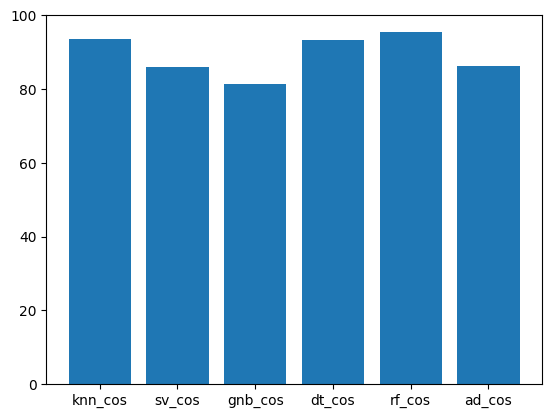

In [ ]:
x4 = ['knn_cos','sv_cos','gnb_cos','dt_cos','rf_cos','ad_cos']
y4 = algo_accuracy3
plt.bar(x4,y4)
plt.show()

**Best results with - RandomForstClassifier(after over_sampling and corelation)**






**Predicting X_test values**

In [ ]:
Y1_pred_os = rf_cos.predict(X1_test_os)
Y1_pred_os

array([0, 0, 1, ..., 0, 1, 0])

**Y_test.values**

In [ ]:
Y1_test_os.value_counts()

0    1999
1    1961
Name: Bankrupt?, dtype: int64

**Confusion-Matrix-Display**

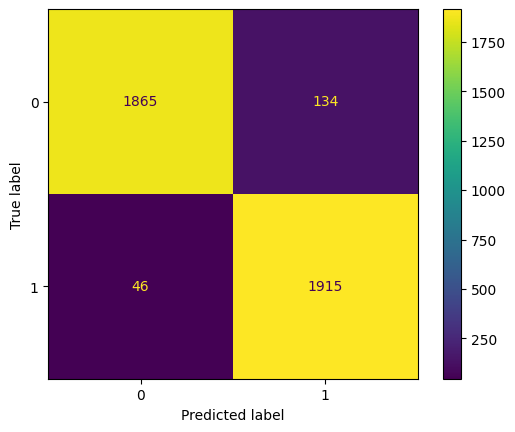

In [ ]:

print(ConfusionMatrixDisplay.from_predictions(Y1_test_os,Y1_pred_os))

**Pedictiong-New-value**

In [ ]:
ynew = rf_cos.predict([[0.370594,0.424389,0.405750,0.169141,0.138736,0.207576,0.792424,0.137757,0.903225,0.716845]])
ynew

if ynew == 1:
  print("Bankrupt")
else:
  print('Not Bankrupt')

Bankrupt


**Program-for-webapp**

In [ ]:
input_data = (0.370594,0.424389,0.405750,0.169141,0.138736,0.207576,0.792424,0.137757,0.903225,0.716845)

#changeing input data to numpy array
input_np = np.asarray(input_data)

# reshapeing the array as we are preicting for one instance
input_np_reshaped = input_np.reshape(1,-1)

y_pred = rf_cos.predict(input_np_reshaped)
print(y_pred)

if (y_pred[0] == 0):
  print('Not Bankrupt')
else:
  print("Bankrupt !!")

[1]
Bankrupt !!


In [ ]:
input_np

array([0.370594, 0.424389, 0.40575 , 0.169141, 0.138736, 0.207576,
       0.792424, 0.137757, 0.903225, 0.716845])

In [ ]:
input_np_reshaped

array([[0.370594, 0.424389, 0.40575 , 0.169141, 0.138736, 0.207576,
        0.792424, 0.137757, 0.903225, 0.716845]])

Saving the trained model

In [ ]:
import pickle


In [ ]:

pickle.dump(rf_cos,open('model.pkl','wb'))

In [ ]:
#loading the saved model
loaded_model = pickle.load(open('model.pkl','rb'))


In [ ]:
input_data = (0.370594,0.424389,0.405750,0.169141,0.138736,0.207576,0.792424,0.137757,0.903225,0.716845)

#changeing input data to numpy array
input_np = np.asarray(input_data)

# reshapeing the array as we are predicting for one instance
input_np_reshaped = input_np.reshape(1,-1)

y_pred = loaded_model.predict(input_np_reshaped)
print(y_pred)

if (y_pred[0] == 0):
  print('Not Bankrupt')
else:
  print("Bankrupt !!")

[1]
Bankrupt !!
